In [1]:
import pandas as pd

data = pd.read_csv("../new_pullreq.csv") 


In [ ]:
data.head()

In [ ]:
data.columns

In [ ]:
pd.set_option('display.max_columns', None)
data.head()

In [2]:
data[['project_id', 'ownername', 'reponame','merged_or_not', 'perc_neg_emotion', 'perc_pos_emotion', 'perc_neu_emotion', 'contrib_gender', 'contrib_country', 'contrib_affiliation', 'inte_country', 'same_country', 'same_affiliation']].dropna(subset=['contrib_gender'])

,project_id,ownername,reponame,merged_or_not,perc_neg_emotion,perc_pos_emotion,perc_neu_emotion,contrib_gender,contrib_country,contrib_affiliation,inte_country,same_country,same_affiliation
2,93139005,binary-com,SmartCharts,1,0.000000,0.000000,0.000000,male,malaysia,NaN,malaysia,1.0,NaN
3,15059440,letsencrypt,boulder,1,0.000000,0.000000,0.000000,male,canada,NaN,NaN,NaN,NaN
5,79189935,compsy,vsv,1,0.000000,0.000000,0.000000,male,NaN,NaN,NaN,NaN,NaN
6,4282330,ros-infrastructure,rosdep,1,0.000000,0.666667,0.333333,male,NaN,NaN,NaN,NaN,NaN
7,19499360,salopensource,sal,1,0.000000,0.000000,0.000000,female,NaN,sas,united states,NaN,NaN
8,1808,candlepin,subscription-manager,1,0.000000,0.333333,0.666667,male,united states,red hat,NaN,NaN,1.0
10,5556,Sage-Bionetworks,SynapseWebClient,1,0.000000,0.000000,0.000000,male,NaN,NaN,NaN,NaN,NaN
11,73033219,Zeit,docs,1,0.000000,0.000000,1.000000,male,peru,NaN,united kingdom,0.0,NaN
12,11735921,arose,ngl,0,1.000000,0.000000,0.000000,male,NaN,NaN,united states,NaN,NaN
13,125530255,mlpiper,mlpiper,1,0.000000,0.000000,0.000000,male,NaN,NaN,NaN,NaN,NaN


In [3]:
data_subset = data[['project_id', 'ownername', 'reponame','merged_or_not', 'contrib_gender', 'contrib_country', 'inte_country', 'same_country']].dropna(subset=['contrib_gender', 'contrib_country'])
data_subset.head()

,project_id,ownername,reponame,merged_or_not,contrib_gender,contrib_country,inte_country,same_country
2,93139005,binary-com,SmartCharts,1,male,malaysia,malaysia,1.0
3,15059440,letsencrypt,boulder,1,male,canada,NaN,NaN
8,1808,candlepin,subscription-manager,1,male,united states,NaN,NaN
11,73033219,Zeit,docs,1,male,peru,united kingdom,0.0
16,46403735,portainer,portainer,1,male,united states,united states,1.0


In [ ]:
data_subset.groupby(['contrib_country', 'contrib_gender', 'merged_or_not'], as_index = False)

In [ ]:
data_us = data_subset[data_subset.contrib_country=='united states']
data_us.groupby('contrib_gender')['ownername'].count()

In [4]:
sub_saharan_africa = ["angola","benin","botswana","burkina faso","burundi","cabo verde","cameroon","central african republic","chad" "comoros ","congo","cote d'ivoire","democratic republic of the congo","djibouti","equatorial guinea","eritrea","ethiopia","gabon","gambia","ghana","guinea","guinea-bissau ","kenya","lesotho","liberia","madagascar","malawi","mali","mauritania","mauritius","mayotte","mozambique" "namibia","niger","nigeria","reunion","rwanda","sao tome and principe","senegal","seychelles","sierra leone","somalia","south africa","south sudan","swaziland","togo","uganda","tanzania","zambia","zimbabwe"]
northern_africa_and_western_asia = ["algeria", "egypt", "libya", "morocco", "sudan", "tunisia", "western sahara", "azerbaijan", "armenia", "bahrain", "cyprus", "georgia", "iraq", "israel", "jordan", "kuwait", "lebanon", "palestinian territories", "oman", "qatar", "saudi arabia", "syria", "turkey", "united arab emirates", "yemen"]
central_and_southern_asia =["kazakhstan", "kyrgyzstan", "tajikistan", "turkmenistan", "uzbekistan", "afghanistan", "bangladesh", "bhutan", "india", "iran", "maldives", "nepal", "pakistan", "sri lanka"]
eastern_and_south_eastern_asia = ["vietnam","taiwan","macau","laos","china", "hong kong", "china, macao sar", "south korea", "japan", "mongolia", "north korea", "brunei", "cambodia", "indonesia", "lao people's democratic republic", "malaysia", "myanmar", "philippines", "singapore", "thailand", "timor-leste", "viet nam"]
latin_america_and_the_caribbean = ["anguilla", "antigua and barbuda", "aruba", "bahamas", "barbados", "bonaire, sint eustatius and saba", "virgin islands", "cayman islands", "cuba", "curacao", "dominica", "dominican republic", "grenada", "guadeloupe", "haiti", "jamaica", "martinique", "montserrat", "puerto rico", "saint kitts and nevis", "saint lucia", "saint vincent and the grenadines", "sint maarten (dutch part)", "trinidad and tobago", "turks and caicos islands", "united states virgin islands", "belize", "honduras", "costa rica", "el salvador", "guatemala", "mexico", "nicaragua", "panama", "argentina", "bolivia", "brazil", "chile", "colombia", "ecuador", "french guiana", "falkland islands (malvinas)", "south georgia & the south sandwich islands", "guyana", "paraguay", "peru", "suriname", "uruguay", "venezuela"]
oceania=["australia", "christmas island", "cocos (keeling) islands", "heard island & mcdonald islands", "norfolk island", "new zealand", "melanesia", "micronesia", "french polynesia"]
europe_and_northern_america = ["bermuda", "canada", "greenland", "united states", "europe", "bulgaria", "belarus", "czech republic", "hungary", "moldova", "poland", "romania", "russia", "slovakia", "ukraine", "åland islands", "channel islands", "denmark", "estonia", "faroe islands", "finland", "isle of man", "united kingdom", "iceland", "ireland", "latvia", "lithuania", "norway", "sweden", "albania", "andorra", "bosnia and herzegovina", "croatia", "greece", "italy", "malta", "montenegro", "portugal", "san marino", "serbia", "slovenia", "spain", "macedonia", "austria", "belgium", "switzerland", "germany", "france", "liechtenstein", "luxembourg", "monaco", "netherlands antilles","netherlands","antarctica","gibraltar","guam","guernsey","jersey","kosovo","new caledonia","pitcairn islands","northern mariana islands"]

In [5]:
data_subset.loc[data_subset["contrib_country"].isin(sub_saharan_africa), "contrib_country"] = "sub_saharan_africa"
data_subset.loc[data_subset["contrib_country"].isin(northern_africa_and_western_asia), "contrib_country"] = "northern_africa_and_western_asia"
data_subset.loc[data_subset["contrib_country"].isin(central_and_southern_asia), "contrib_country"] = "central_and_southern_asia"
data_subset.loc[data_subset["contrib_country"].isin(eastern_and_south_eastern_asia), "contrib_country"] = "eastern_and_south_eastern_asia"
data_subset.loc[data_subset["contrib_country"].isin(latin_america_and_the_caribbean), "contrib_country"] = "latin_america_and_the_caribbean"
data_subset.loc[data_subset["contrib_country"].isin(oceania), "contrib_country"] = "oceania"
data_subset.loc[data_subset["contrib_country"].isin(europe_and_northern_america), "contrib_country"] = "europe_and_northern_america"
data_subset.loc[data_subset["contrib_country"].isin(["mozambique"]), "contrib_country"] = "sub_saharan_africa"

In [ ]:
data_subset

In [6]:
a = data_subset.groupby(['contrib_country', 'contrib_gender'], as_index = False)['project_id'].count()
a

,contrib_country,contrib_gender,project_id
0,central_and_southern_asia,female,2084
1,central_and_southern_asia,male,8577
2,eastern_and_south_eastern_asia,female,12954
3,eastern_and_south_eastern_asia,male,63872
4,europe_and_northern_america,female,86609
5,europe_and_northern_america,male,1046385
6,latin_america_and_the_caribbean,female,2019
7,latin_america_and_the_caribbean,male,33297
8,northern_africa_and_western_asia,female,882
9,northern_africa_and_western_asia,male,11678


In [7]:

data_f = a.loc[a['contrib_gender'] == "female"]
data_f

,contrib_country,contrib_gender,project_id
0,central_and_southern_asia,female,2084
2,eastern_and_south_eastern_asia,female,12954
4,europe_and_northern_america,female,86609
6,latin_america_and_the_caribbean,female,2019
8,northern_africa_and_western_asia,female,882
10,oceania,female,1825
12,sub_saharan_africa,female,217


In [8]:
data_m = a.loc[a['contrib_gender'] == "male"]
data_m

,contrib_country,contrib_gender,project_id
1,central_and_southern_asia,male,8577
3,eastern_and_south_eastern_asia,male,63872
5,europe_and_northern_america,male,1046385
7,latin_america_and_the_caribbean,male,33297
9,northern_africa_and_western_asia,male,11678
11,oceania,male,24889
13,sub_saharan_africa,male,5982


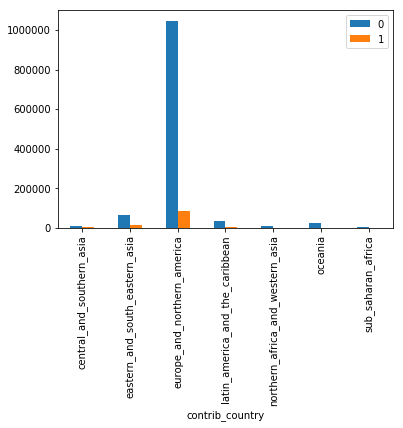

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame(np.c_[data_m['project_id'],data_f['project_id']], index=data_m['contrib_country'])
df.plot.bar()

plt.show()
